In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',10)

In [16]:
#데이터 불러오기
titanic_df = pd.read_csv(r'C:\Users\kis91\Desktop\python study\data\titanic\titanic_train.csv')
print(titanic_df.head(5),'\n')
print('학습데이터정보 :')
print(titanic_df.info())

   PassengerId  Survived  Pclass       Name     Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked
0          1           0       3  Braund...    male  22.0      1      0  A/5 21171   7.2500   NaN        S
1          2           1       1  Cuming...  female  38.0      1      0   PC 17599  71.2833   C85        C
2          3           1       3  Heikki...  female  26.0      0      0  STON/O...   7.9250   NaN        S
3          4           1       1  Futrel...  female  35.0      1      0     113803  53.1000  C123        S
4          5           0       3  Allen,...    male  35.0      0      0     373450   8.0500   NaN        S 

학습데이터정보 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64

In [22]:
#결측값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
#문자열 변수 빈도확인

print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
E101             3
C22 C26          3
F2               3
D                3
E25              2
C83              2
D35              2
F G73            2
B77              2
B18              2
B5               2
C65              2
D36              2
E121             2
B35              2
E24              2
E33              2
B20              2
C124             2
D17              2
C92              2
C125             2
B22              2
E67              2
E44              2
              ... 
E17              1
A6               1
A24              1
A14              1
D47              1
E10              1
C148             1
C82              1
C111             1
A26              1
B39              1
C30              1
B19              1
B30              1
E12              1
D10 D12          1
C104             1
A34              1
D45              

In [36]:
#Carbin 변수에 선실등급만 추출
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(5))

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


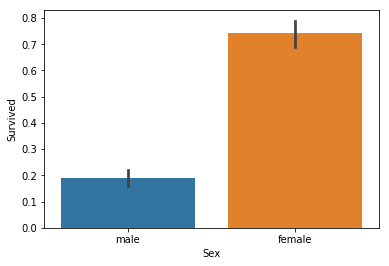

In [48]:
print(titanic_df.groupby(['Sex','Survived'])['Survived'].count())
sns.barplot(x='Sex',y='Survived',data=titanic_df)

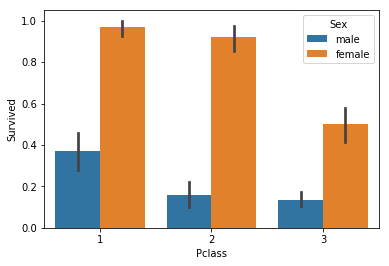

In [51]:
#객실 등급에따른 생존확률
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

C:\Users\kis91\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


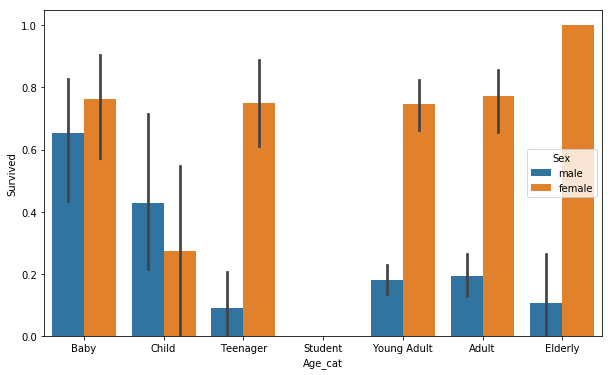

In [61]:
#나이에 따른 생존확률

### age함수 설정
def get_category(age):
    if age <=5 : cat = 'Baby'
    elif age <=12 : cat = 'Child'
    elif age <=18 : cat = 'Teenager'
    elif age <=25 : cat = 'student'
    elif age <=35 : cat = 'Young Adult'
    elif age <=60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

### 막대그래프 크기 더 크게 설정
plt.figure(figsize=(10,6))

###X축의 깂을 순차적으로 표시하기 위한 설정
group_names = ['Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

###Age_cat 변수추가
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order = group_names)

In [66]:
#범주형 자료를 숫자값으로 인코딩 함수
def encode_features(data):
    variables = ['Cabin','Sex','Embarked']
    for feature in variables:
        le = preprocessing.LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
        
    return(data)


titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,Braund...,1,22.0,1,0,A/5 21171,7.2500,7,3,student
1,2,1,1,Cuming...,0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,Heikki...,0,26.0,0,0,STON/O...,7.9250,7,3,Young ...
3,4,1,1,Futrel...,0,35.0,1,0,113803,53.1000,2,3,Young ...
4,5,0,3,"Allen,...",1,35.0,0,0,373450,8.0500,7,3,Young ...


In [72]:
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df

#불필요한 변수 제거 함수
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    
    return df

#범주형 변수 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    
    for i in features:
        encoder = preprocessing.LabelEncoder()
        encoder.fit(df[i])
        df[i] = encoder.transform(df[i])
        
    return df

#위의 3개 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df


In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#원본데이터를 재 로딩하고 데이터 다루기
titanic_df = pd.read_csv(r'C:\Users\kis91\Desktop\python study\data\titanic\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)
x_titanic_df = transform_features(x_titanic_df)

x_train,x_test,y_train,y_test = train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
x_train.head()


#결정트리, Random Forest, 로지스틱 회귀를 위한 Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#LogisticRegression 학습/평가
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)
print('Logistic accuracy :',accuracy_score(y_test,lr_pred))

#결정트리 학습/튜닝/평가
parms = {'max_depth':[2,3,5,10],
        'min_samples_split':[2,3,5,10],
        'min_samples_leaf':[1,3,5,8]}
grid_dclf = GridSearchCV(dt_clf,param_grid=parms,scoring='accuracy',cv=5)
grid_dclf.fit(x_train, y_train)
print('결정트리 최적 튜닝 :',grid_dclf.best_params_)
print('결정트리 최고 정확도 :',grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dt_pred = best_dclf.predict(x_test)
print('결정트리 accuracy :',accuracy_score(y_test,dt_pred))

# Randomforest 학습/튜닝/평가
parms = {'n_estimators':np.arange(start=1,stop=30).tolist(),
        'max_depth':[2,3,5],
        'min_samples_split':[2,3,5],
        'min_samples_leaf':[1,5,8]}
grid_rclf = GridSearchCV(rf_clf,param_grid=parms,scoring='accuracy',cv=5)
grid_rclf.fit(x_train, y_train)
print('Randomforest 최적 튜닝 :',grid_rclf.best_params_)
print('Randomforest 최고 정확도 :',grid_rclf.best_score_)

best_rclf = grid_rclf.best_estimator_
rf_pred = best_rclf.predict(x_test)
print('Randomforest accuracy :',accuracy_score(y_test,rf_pred))

C:\Users\kis91\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic accuracy : 0.8659217877094972


C:\Users\kis91\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


결정트리 최적 튜닝 : {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
결정트리 최고 정확도 : 0.8019662921348315
결정트리 accuracy : 0.8715083798882681
Randomforest 최적 튜닝 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 13}
Randomforest 최고 정확도 : 0.8216292134831461
Randomforest accuracy : 0.8770949720670391


C:\Users\kis91\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
